In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
torch.manual_seed(0)

# Simulate Functions

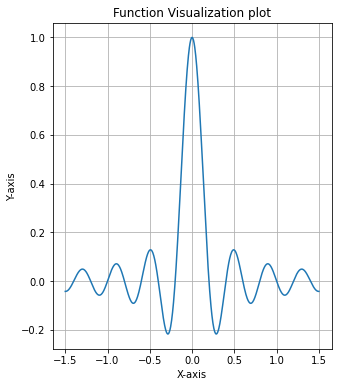

In [3]:
x1 = torch.unsqueeze(torch.linspace(-1.5, 1.5, 800), dim = 1)
y1 = torch.sin(5 * np.pi * x1) / (5 * np.pi * x1) 
#Visualization of first function
plt.figure(figsize = (5, 6))
plt.plot(x1, y1)
plt.title("Function Visualization plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

In [4]:
class model_1(nn.Module):
    def __init__(self, ):
        super(model_1, self).__init__()
        self.hide1 = nn.Linear(1, 5) #hidden layer 1..
        self.hide2 = nn.Linear(5, 10)
        self.hide3 = nn.Linear(10, 10)
        self.hide4 = nn.Linear(10, 10)
        self.hide5 = nn.Linear(10, 10)
        self.hide6 = nn.Linear(10, 10)
        self.hide7 = nn.Linear(10, 5)
        self.out = nn.Linear(5, 1) #output layer
    
    def forward(self, x):
        x = nn.functional.leaky_relu(self.hide1(x))
        x = nn.functional.leaky_relu(self.hide2(x))
        x = nn.functional.leaky_relu(self.hide3(x))
        x = nn.functional.leaky_relu(self.hide4(x))
        x = nn.functional.leaky_relu(self.hide5(x))
        x = nn.functional.leaky_relu(self.hide6(x))
        x = nn.functional.leaky_relu(self.hide7(x))
        x = self.out(x)
        return x

class model_2(nn.Module):
    def __init__(self, ):
        super(model_2, self).__init__()
        self.hide1 = nn.Linear(1, 10)
        self.hide2 = nn.Linear(10, 18)
        self.hide3 = nn.Linear(18, 15)
        self.hide4 = nn.Linear(15, 4)
        self.out = nn.Linear(4, 1)
        
    def forward(self, x):
        x = nn.functional.leaky_relu(self.hide1(x))
        x = nn.functional.leaky_relu(self.hide2(x))
        x = nn.functional.leaky_relu(self.hide3(x))
        x = nn.functional.leaky_relu(self.hide4(x))
        x = self.out(x)
        return x

    
class model_3(nn.Module):
    def __init__(self, ):
        super(model_3, self).__init__()
        self.hide1 = nn.Linear(1, 190)
        self.out = nn.Linear(190, 1)
        
    def forward(self, x):
        x = nn.functional.leaky_relu(self.hide1(x))
        x = self.out(x)
        return x


In [5]:
loss_fun = torch.nn.MSELoss()
epoch_max = 20000

m1 = model_1()
m2 = model_2()
m3 = model_3()

#Optimizer for three models
optim_m1 = torch.optim.AdamW(m1.parameters(), lr = 0.001, weight_decay = 1e-4)
optim_m2 = torch.optim.AdamW(m2.parameters(), lr = 0.001, weight_decay = 1e-4)
optim_m3 = torch.optim.AdamW(m3.parameters(), lr = 0.001, weight_decay = 1e-4)

#Train Model Input Data
def train(model, x, y, optimizer):
    model_loss = []
    for epoch in range(epoch_max):
        predict = model(x)
        loss = loss_fun(predict, y) #Mean squared error loss function
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        model_loss.append(loss.item())
    return model_loss, predict


In [6]:
#Loss Output and Prediction results for function 1
model_loss_1, predict_1 = train(m1, x1, y1, optim_m1)
model_loss_2, predict_2 = train(m2, x1, y1, optim_m2)
model_loss_3, predict_3 = train(m3, x1, y1, optim_m3)


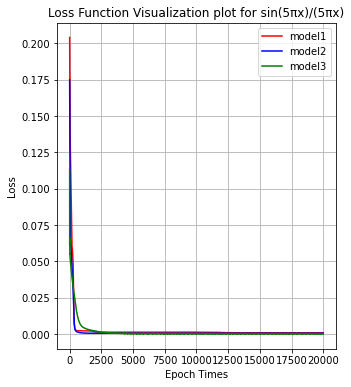

In [7]:
plt.figure(figsize = (5, 6))
plt.plot(model_loss_1, color="r", label = 'model1')
plt.plot(model_loss_2, color="b", label = 'model2')
plt.plot(model_loss_3, color = "g", label = 'model3')
plt.title("Loss Function Visualization plot for sin(5πx)/(5πx)")
plt.xlabel("Epoch Times")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

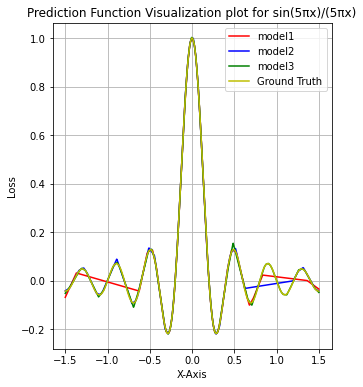

In [8]:
plt.figure(figsize = (5, 6))
plt.plot(x1.numpy(), predict_1.detach().numpy(), color="r", label = 'model1')
plt.plot(x1.numpy(), predict_2.detach().numpy(), color="b", label = 'model2')
plt.plot(x1.numpy(), predict_3.detach().numpy(), color = "g", label = 'model3')
plt.plot(x1.numpy(), y1.numpy(), color = "y", label = 'Ground Truth')
plt.title("Prediction Function Visualization plot for sin(5πx)/(5πx)")
plt.xlabel("X-Axis")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
x2 = torch.unsqueeze(torch.linspace(-1.5, 1.5, 800), dim = 1)
y2 = torch.sign(torch.sin(5 * np.pi * x2))
#Visualization of function 2
plt.figure(figsize = (5, 6))
plt.plot(x2, y2)
plt.title("Function Visualization plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()


In [12]:
loss_fun = torch.nn.MSELoss()
epoch_max = 20000

m1 = model_1()
m2 = model_2()
m3 = model_3()

#Optimizer for three models
optim2_m1 = torch.optim.AdamW(m1.parameters(), lr = 0.001, weight_decay = 1e-4)
optim2_m2 = torch.optim.AdamW(m2.parameters(), lr = 0.001, weight_decay = 1e-4)
optim2_m3 = torch.optim.AdamW(m3.parameters(), lr = 0.001, weight_decay = 1e-4)

model2_loss_1, predict2_1 = train(m1, x2, y2, optim2_m1)
model2_loss_2, predict2_2 = train(m2, x2, y2, optim2_m2)
model2_loss_3, predict2_3 = train(m3, x2, y2, optim2_m3)


KeyboardInterrupt: 

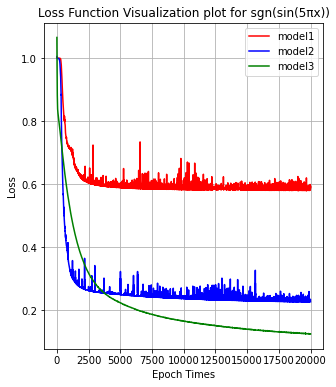

In [13]:
plt.figure(figsize = (5, 6))
plt.plot(model2_loss_1, color="r", label = 'model1')
plt.plot(model2_loss_2, color="b", label = 'model2')
plt.plot(model2_loss_3, color = "g", label = 'model3')
plt.title("Loss Function Visualization plot for sgn(sin(5πx))")
plt.xlabel("Epoch Times")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()


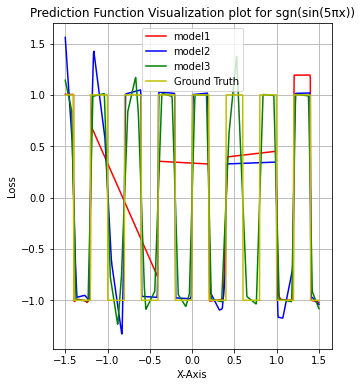

In [14]:
plt.figure(figsize = (5, 6))
plt.plot(x2.numpy(), predict2_1.detach().numpy(), color="r", label = 'model1')
plt.plot(x2.numpy(), predict2_2.detach().numpy(), color="b", label = 'model2')
plt.plot(x2.numpy(), predict2_3.detach().numpy(), color = "g", label = 'model3')
plt.plot(x2.numpy(), y2.numpy(), color = "y", label = 'Ground Truth')
plt.title("Prediction Function Visualization plot for sgn(sin(5πx))")
plt.xlabel("X-Axis")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

# Training on Actual Task

In [18]:
#Load MNIST datasets
trainset_MNIST = torchvision.datasets.MNIST('data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
train_loader_MNIST = DataLoader(trainset_MNIST, batch_size = 512, shuffle = True)

testset_MNIST = torchvision.datasets.MNIST('data', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test_loader_MNIST = DataLoader(testset_MNIST, batch_size = 512, shuffle = True)

In [19]:
#Load CIFAR10 datasets
trainset_CIFAR10 = torchvision.datasets.CIFAR10('data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
train_loader_CIFAR10 = DataLoader(trainset_CIFAR10, batch_size = 512, shuffle = True)

testset_CIFAR10 = torchvision.datasets.CIFAR10('data', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test_loader_CIFAR10 = DataLoader(testset_CIFAR10, batch_size = 512, shuffle = True)

Files already downloaded and verified
Files already downloaded and verified


In [20]:
class model_CNN_1(nn.Module):
    def __init__(self, Input, data):
        super(model_CNN_1, self).__init__()
        self.conv1 = nn.Conv2d(Input, 10, kernel_size = 3, padding = 1) #stride = 1 by default
        self.conv2 = nn.Conv2d(10, 15, kernel_size = 3, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)
        self.flatten = nn.Flatten()
        if data == 'mnist':
            self.fc1 = nn.Linear(15 * 14 * 14, 20)
        else:
            self.fc1 = nn.Linear(15 * 16 * 16, 20)
        self.fc2 = nn.Linear(20, 10)
    
    def forward(self, x):
        x = nn.functional.leaky_relu(self.conv1(x))
        x = nn.functional.leaky_relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = self.flatten(x)
        x = nn.functional.leaky_relu(self.fc1(x))
        x = nn.functional.leaky_relu(self.fc2(x))
        return x

class model_CNN_2(nn.Module):
    def __init__(self, Input, data):
        super(model_CNN_2, self).__init__()
        self.conv1 = nn.Conv2d(Input, 10, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 3, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        if data == 'mnist':
            self.fc = nn.Linear(20 * 14 * 14, 10)
        else:
            self.fc = nn.Linear(20 * 16 * 16, 10)
        
    def forward(self, x):
        x = nn.functional.leaky_relu(self.conv1(x))
        x = nn.functional.leaky_relu(self.conv2(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = nn.functional.leaky_relu(self.fc(x))
        return x
    
class model_CNN_3(nn.Module):
    def __init__(self, Input, data):
        super(model_CNN_3, self).__init__()
        self.conv = nn.Conv2d(Input, 20, kernel_size = 3, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        if data == 'mnist':
            self.fc1 = nn.Linear(20 * 14 * 14, 60)
        else:
            self.fc1 = nn.Linear(20 * 16 * 16, 60)
        self.fc2 = nn.Linear(60, 10)
        
    def forward(self, x):
        x = nn.functional.leaky_relu(self.conv(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = nn.functional.leaky_relu(self.fc1(x))
        x = nn.functional.leaky_relu(self.fc2(x)) 
        return x

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
loss_fun2 = torch.nn.CrossEntropyLoss()
epoch_max = 50

M1_MNIST = model_CNN_1(1, 'mnist')
M2_MNIST = model_CNN_2(1, 'mnist')
M3_MNIST = model_CNN_3(1, 'mnist')

#Optimizer for three models
optim_M1_M = torch.optim.AdamW(M1_MNIST.parameters(), lr = 0.0003, weight_decay = 1e-4)
optim_M2_M = torch.optim.AdamW(M2_MNIST.parameters(), lr = 0.0003, weight_decay = 1e-4)
optim_M3_M = torch.optim.AdamW(M3_MNIST.parameters(), lr = 0.0003, weight_decay = 1e-4)

#Train Model Input Data
def train2(model, optimizer, data_loader):
    loss_train = []
    acc_train = []
    model = model.to(device)
    for epoch in range(epoch_max):
        total_correct = 0
        total_loss = 0
        total = len(data_loader.dataset)
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            predict = model(images)
            loss = loss_fun2(predict, labels)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            predicted = torch.argmax(predict, dim = 1)
            total_correct += (predicted == labels).sum().item()
        accuracy = total_correct / total
        loss_a = total_loss / len(data_loader)
        
        loss_train.append(loss_a)
        acc_train.append(accuracy)
    return loss_train, acc_train

def test2(model, data_loader):
    acc_test = []
    model = model.to(device)
    for epoch in range(epoch_max):
        total_correct = 0
        total = len(data_loader.dataset)
        with torch.no_grad():
            for images, labels in data_loader:
                images, labels = images.to(device), labels.to(device)
                predict = model(images)
                predicted = torch.argmax(predict, dim = 1)
                total_correct += (predicted == labels).sum().item()
            accuracy = total_correct / total
            acc_test.append(accuracy)
    return acc_test

In [25]:
loss_train_1, acc_train_1 = train2(M1_MNIST, optim_M1_M, train_loader_MNIST)
loss_train_2, acc_train_2 = train2(M2_MNIST, optim_M2_M, train_loader_MNIST)
loss_train_3, acc_train_3 = train2(M3_MNIST, optim_M3_M, train_loader_MNIST)

acc_test_1 = test2(M1_MNIST, test_loader_MNIST)
acc_test_2 = test2(M2_MNIST, test_loader_MNIST)
acc_test_3 = test2(M3_MNIST, test_loader_MNIST)


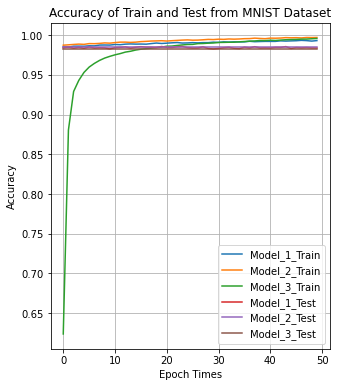

In [26]:
plt.figure(figsize = (5, 6))
plt.plot(acc_train_1, label = 'Model_1_Train')
plt.plot(acc_train_2, label = 'Model_2_Train')
plt.plot(acc_train_3, label = 'Model_3_Train')
plt.plot(acc_test_1, label = 'Model_1_Test')
plt.plot(acc_test_2, label = 'Model_2_Test')
plt.plot(acc_test_3, label = 'Model_3_Test')
plt.title("Accuracy of Train and Test from MNIST Dataset")
plt.xlabel("Epoch Times")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

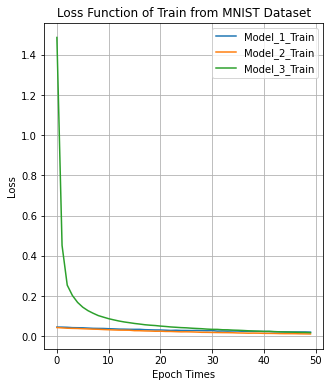

In [27]:
plt.figure(figsize = (5, 6))
plt.plot(loss_train_1, label = 'Model_1_Train')
plt.plot(loss_train_2, label = 'Model_2_Train')
plt.plot(loss_train_3, label = 'Model_3_Train')
plt.title("Loss Function of Train from MNIST Dataset")
plt.xlabel("Epoch Times")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

In [28]:
M1_CIFAR10 = model_CNN_1(3, 'cifar10')
M2_CIFAR10 = model_CNN_2(3, 'cifar10')
M3_CIFAR10 = model_CNN_3(3, 'cifar10')

#Optimizer for three models
optim_M1_C = torch.optim.AdamW(M1_CIFAR10.parameters(), lr = 0.0003, weight_decay = 1e-4)
optim_M2_C = torch.optim.AdamW(M2_CIFAR10.parameters(), lr = 0.0003, weight_decay = 1e-4)
optim_M3_C = torch.optim.AdamW(M3_CIFAR10.parameters(), lr = 0.0003, weight_decay = 1e-4)


In [29]:
loss_train2_1, acc_train2_1 = train2(M1_CIFAR10, optim_M1_C, train_loader_CIFAR10)
loss_train2_2, acc_train2_2 = train2(M2_CIFAR10, optim_M2_C, train_loader_CIFAR10)
loss_train2_3, acc_train2_3 = train2(M3_CIFAR10, optim_M3_C, train_loader_CIFAR10)

acc_test2_1 = test2(M1_CIFAR10, test_loader_CIFAR10)
acc_test2_2 = test2(M2_CIFAR10, test_loader_CIFAR10)
acc_test2_3 = test2(M3_CIFAR10, test_loader_CIFAR10)

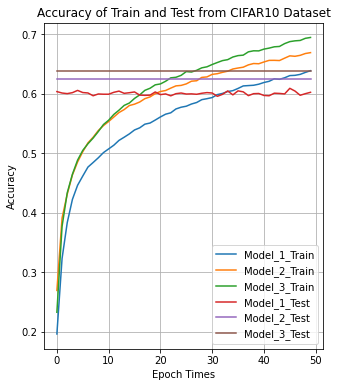

In [30]:
plt.figure(figsize = (5, 6))
plt.plot(acc_train2_1, label = 'Model_1_Train')
plt.plot(acc_train2_2, label = 'Model_2_Train')
plt.plot(acc_train2_3, label = 'Model_3_Train')
plt.plot(acc_test2_1, label = 'Model_1_Test')
plt.plot(acc_test2_2, label = 'Model_2_Test')
plt.plot(acc_test2_3, label = 'Model_3_Test')
plt.title("Accuracy of Train and Test from CIFAR10 Dataset")
plt.xlabel("Epoch Times")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

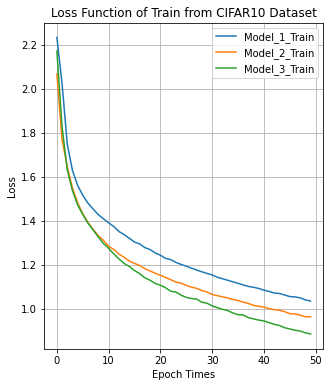

In [31]:
plt.figure(figsize = (5, 6))
plt.plot(loss_train2_1, label = 'Model_1_Train')
plt.plot(loss_train2_2, label = 'Model_2_Train')
plt.plot(loss_train2_3, label = 'Model_3_Train')
plt.title("Loss Function of Train from CIFAR10 Dataset")
plt.xlabel("Epoch Times")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()